In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
np.random.seed(1)
#print(os.getcwd())
u_orig = plt.imread("paradrop.png")
rows, cols, colors = u_orig.shape
#print (u_orig)
print (cols)
known = np.zeros((rows, cols, colors))
for i in range(rows):
    for j in range(cols):
        if np.random.random() > 0.1:
            for k in range(colors):
                known[i, j, k] = 1
u_corr = known * u_orig

210


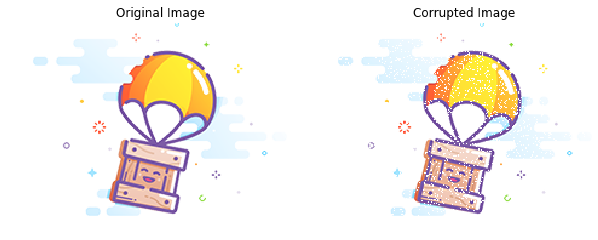

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(u_orig, cmap='gray');
ax[0].set_title("Original Image")
ax[0].axis('off')
ax[1].imshow(u_corr);
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [35]:
u_corr1 = u_corr.copy()

In [36]:
h = 0.01
e = 1e-9
for i in range(1, rows - 1):
    for j in range(cols - 1):
        grad1 = u_corr[i][j] / ((u_corr[i][j]**2 + u_corr[i][j + 1]**2 + e)**0.5) 
        grad2 = u_corr[i][j] / ((u_corr[i][j]**2 + u_corr[i + 1][j]**2 + e)**0.5)
        grad3 = u_corr[i][j] / ((u_corr[i - 1][j]**2 + u_corr[i][j]**2 + e)**0.5)
        grad4 = u_corr[i][j] / ((u_corr[i][j - 1]**2 + u_corr[i][j]**2 + e)**0.5)
        grad5 = 2 / (rows * cols * colors) * (u_corr1[i][j] - u_corr[i][j])
        u_corr[i][j] = u_corr[i][j] - h * (1. / (cols * rows) * (grad1 + grad2 + grad3 + grad4) + grad5)
        #rint('DBG')
        

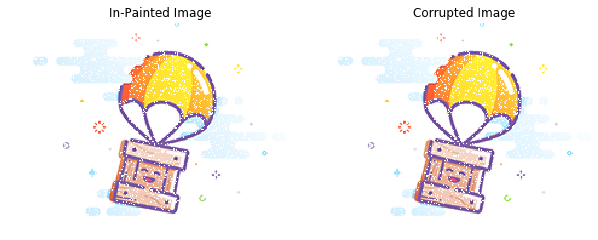

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].imshow(u_corr)
ax[0].set_title("In-Painted Image")
ax[0].axis('off')
ax[1].imshow(u_corr1);
ax[1].set_title("Corrupted Image")
ax[1].axis('off');

In [19]:
print(u_corr)

[[[0.         0.         0.         0.        ]
  [0.93333334 0.98039216 1.         0.        ]
  [0.         0.         0.         0.        ]
  ...
  [1.         0.96078432 0.6901961  0.        ]
  [1.         0.96078432 0.6901961  0.        ]
  [1.         0.96078432 0.6901961  0.        ]]

 [[0.         0.         0.         0.        ]
  [0.920754   0.96781273 0.98742054 0.        ]
  [0.         0.         0.         0.        ]
  ...
  [0.         0.         0.         0.        ]
  [0.98940973 0.95019416 0.67960711 0.        ]
  [1.         0.96078432 0.6901961  0.        ]]

 [[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  ...
  [0.98840215 0.94918603 0.67859341 0.        ]
  [0.98938742 0.95017094 0.67957475 0.        ]
  [1.         0.96078432 0.6901961  0.        ]]

 ...

 [[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.     